In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
import energy_utils as eu

In [2]:
lon = -105
lat = 40

columns = ['ghi', 'air_temperature']
#columns = ['ghi', 'dhi', 'air_temperature', 
#           'wind_speed', 'relative_humidity', 
#           'surface_pressure', 'clearsky_ghi']

_, time_series = eu.timeseries(lon=lon, lat=lat, years=['2019', '2020'], columns=columns)

17520
17568 35088


In [17]:
df = pd.DataFrame()
df['ds'] = time_series.index
df['y'] = time_series['ghi'].values

In [34]:
df_train, df_val = m.split_df(df, freq='30min', valid_p=0.01)

In [54]:
NeuralProphet?

In [72]:
m = NeuralProphet(
    n_lags=48,
    ar_sparsity=1,
    n_changepoints=10,
    changepoints_range=0.8,
    yearly_seasonality=True,
    weekly_seasonality=False,
    num_hidden_layers = 2,
    d_hidden=20,
    learning_rate=0.005,
    epochs=100
)

metrics = m.fit(df_train, freq='30min', valid_p=0.2)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
Epoch[100/100]: 100%|██████████| 100/100 [01:31<00:00,  1.10it/s, SmoothL1Loss=0.00136, MAE=18.7, MSE=1.92e+3, RegLoss=0]


In [73]:
m.config_train.learning_rate

0.005

In [74]:
m.test(df_val)

INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE     MSE
1         0.000  9.880 479.119
INFO:NP.forecaster:Validation metrics:    SmoothL1Loss    MAE     MSE
1         0.000  9.880 479.119


,SmoothL1Loss,MAE,MSE
0,0.00034,9.88013,479.119019


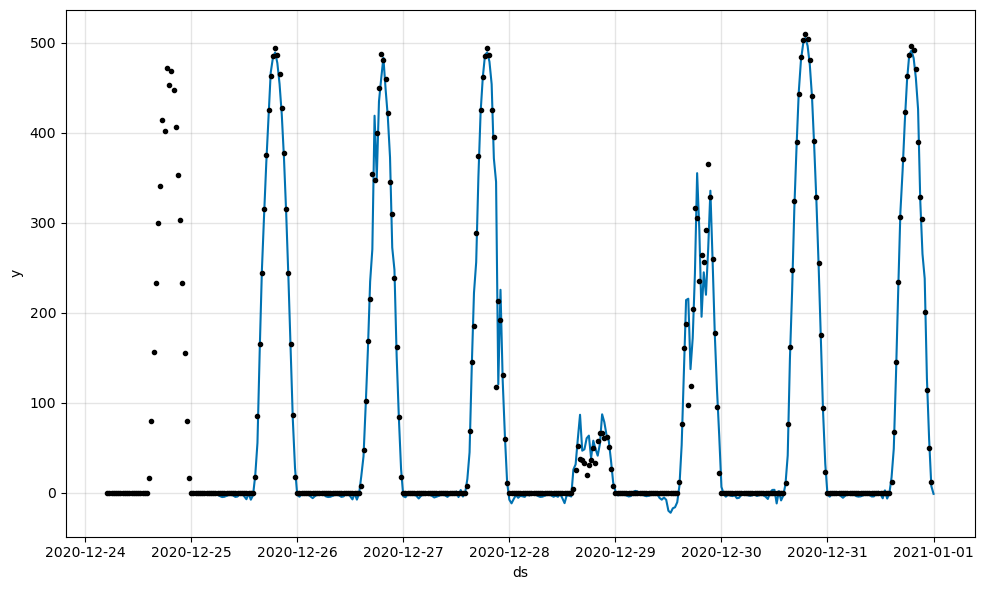

In [75]:
future = m.make_future_dataframe(df_val, n_historic_predictions=True)
forecast = m.predict(future)
m.plot(forecast) 

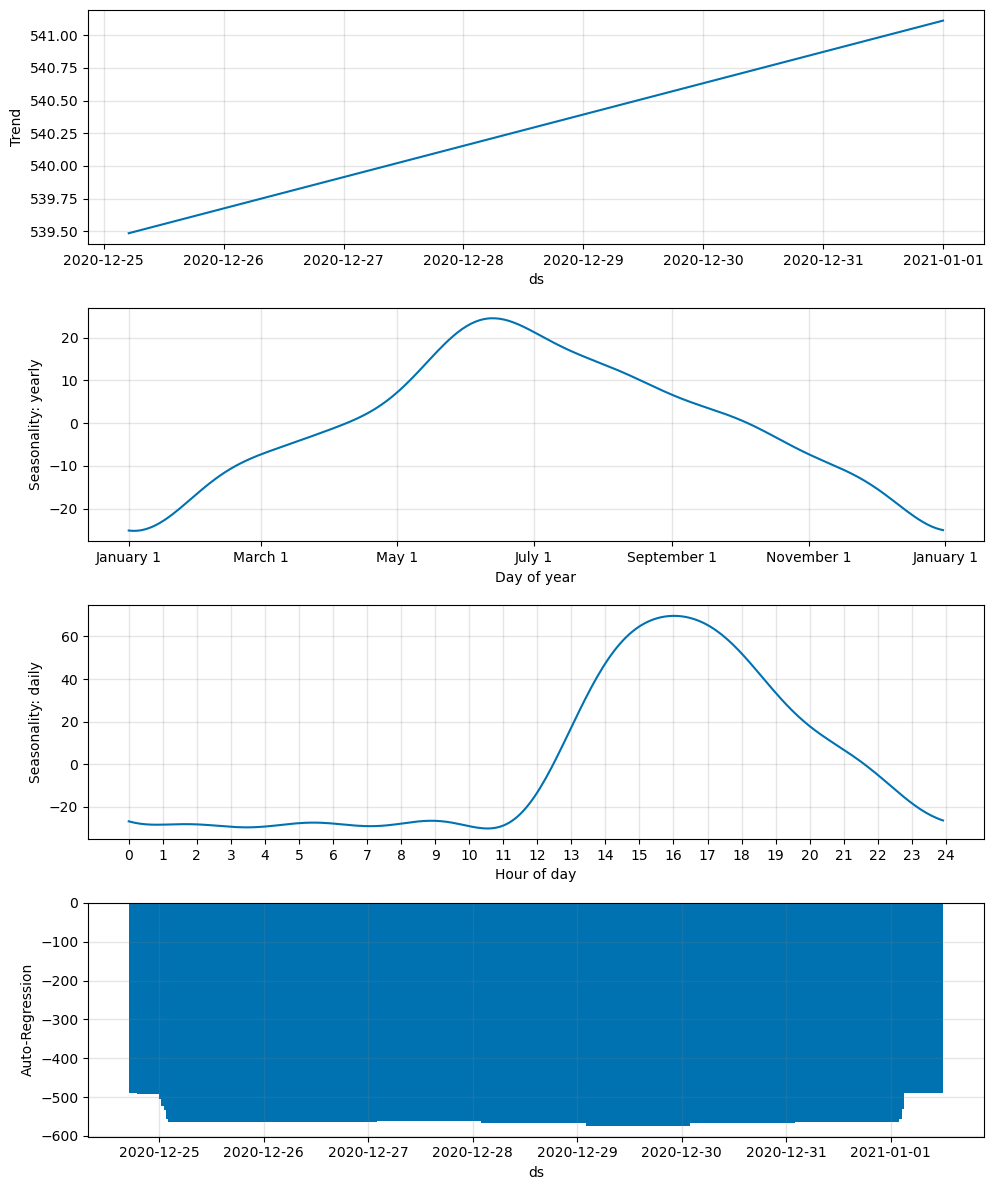

In [76]:
m.plot_components(forecast)

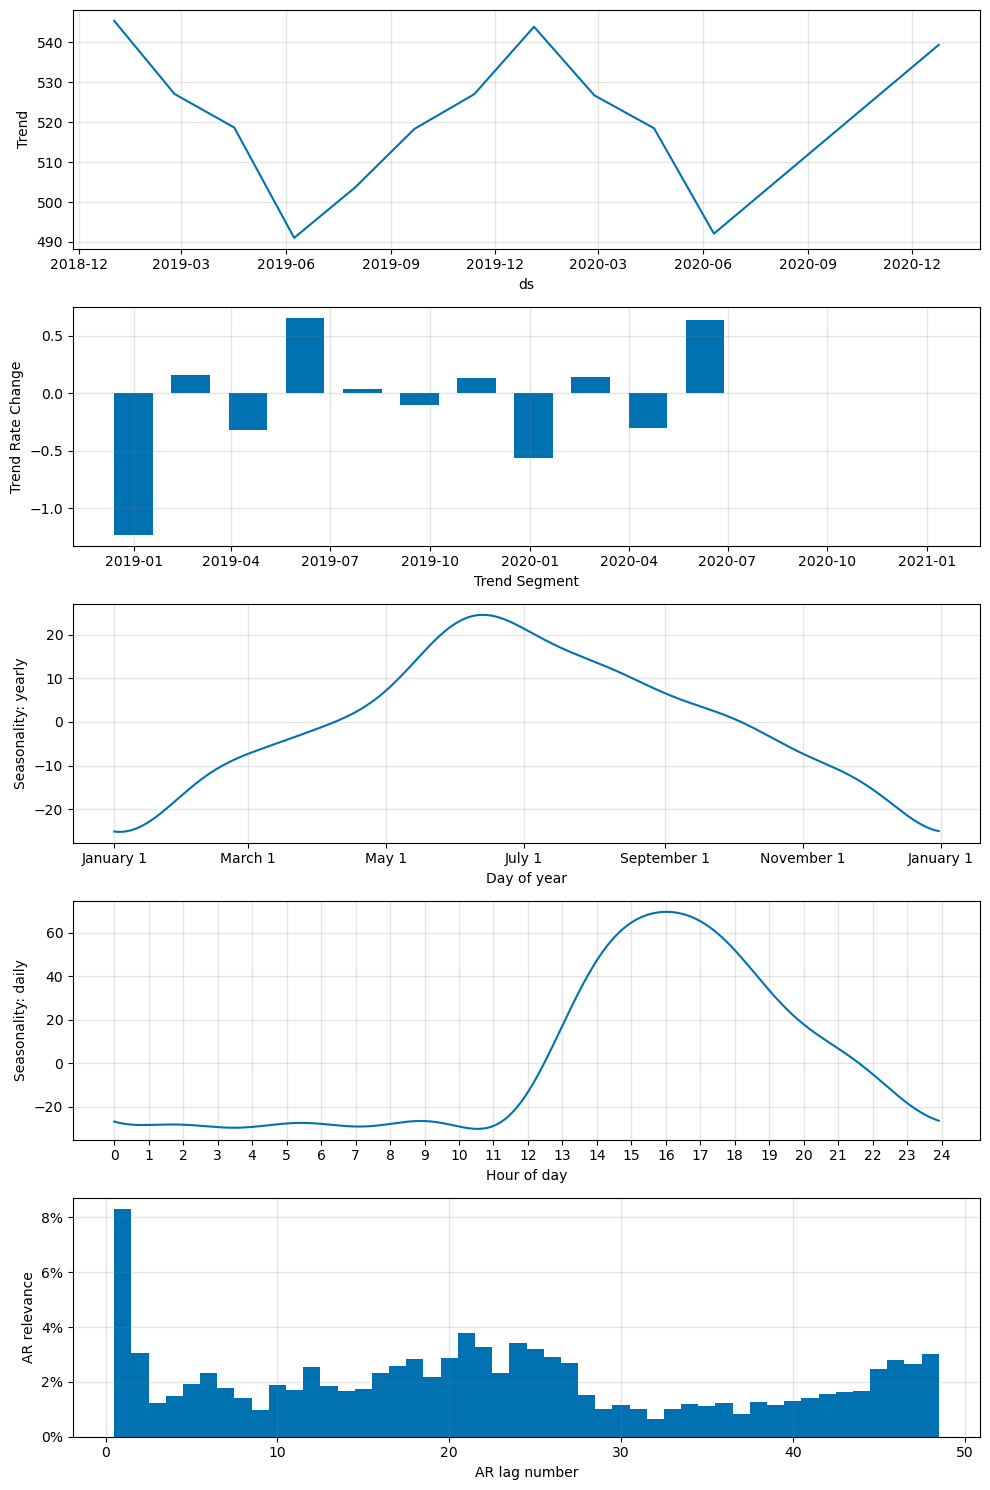

In [77]:
m.plot_parameters()

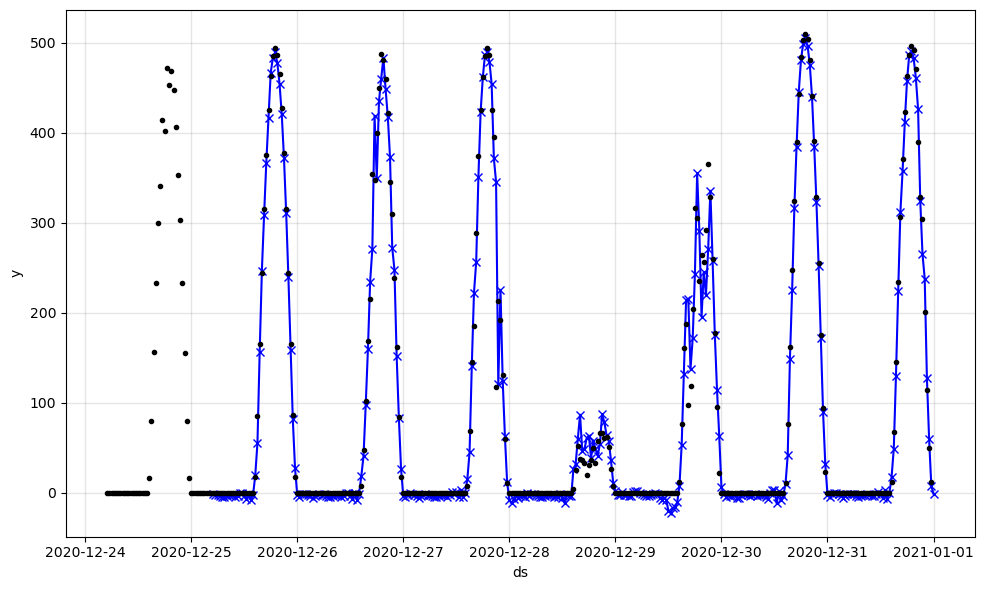

In [78]:
m.highlight_nth_step_ahead_of_each_forecast(1).plot(forecast)

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/prophet/lib/python3.7/site-packages/neuralprophet/utils.py:388: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[forecast_name] = None

  df[forecast_name] = None



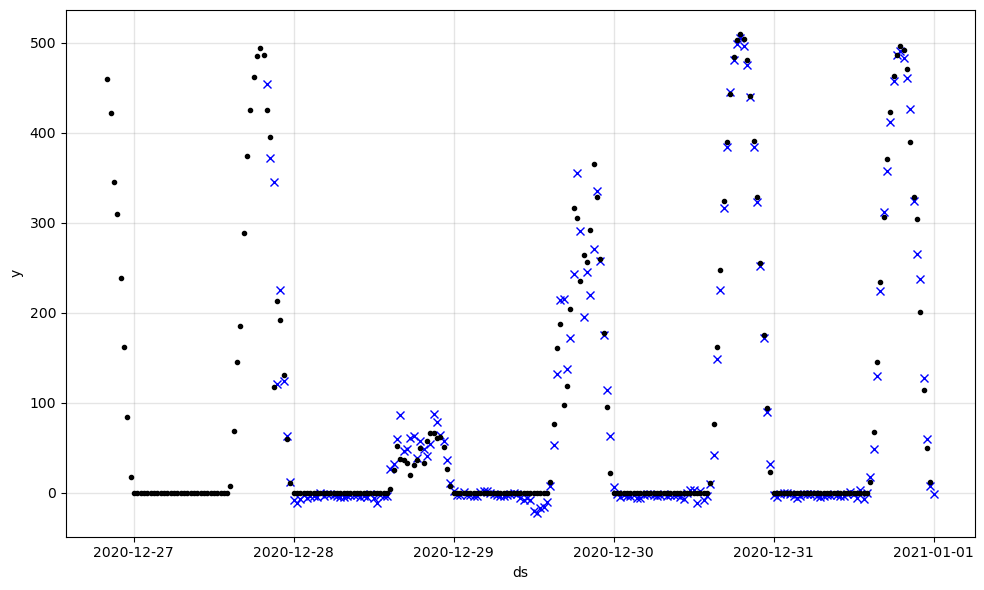

In [79]:
m.plot_last_forecast(forecast, include_previous_forecasts=200)